# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [35]:
# Your code here. 
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='X', ylabel='Y'>

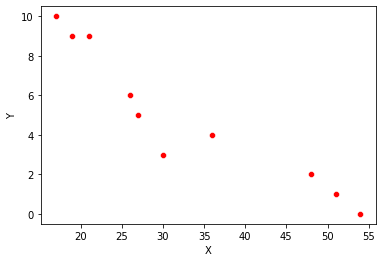

In [7]:
# Your code here.
sns.scatterplot(x=student_data.X,y=student_data.Y, color="r")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [8]:
# Your response here.
# Los de menor edad llegan más tarde

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
# Your response here.
np.cov(student_data.Y, student_data.X)

array([[ 12.54444444, -45.56666667],
       [-45.56666667, 187.65555556]])

In [13]:
np.cov(student_data.Y, student_data.X)

array([[ 12.54444444, -45.56666667],
       [-45.56666667, 187.65555556]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [17]:
# Your response here.
slope, intercept, r_value, p_value, std_err = linregress(student_data.X, student_data.Y)
slope, intercept, r_value, p_value, std_err

(-0.2428207709159808,
 12.888803363135768,
 -0.9391626886887121,
 5.56665383455343e-05,
 0.03139728816158607)

Plot your regression model on your scatter plot.

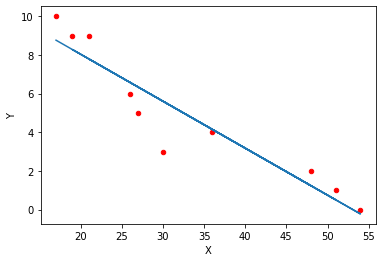

In [22]:
# Your code here
student_data.plot('X','Y',kind='scatter', color='r')
plt.plot(student_data.X,intercept+slope*student_data.X)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# Como lo mencione al inicio que a menor edad más tarde llega a clase se puede notar la correlación y como va decendiendo a medida aumenta la edad

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [25]:
# Import any libraries you may need & the data
vehicle = pd.read_csv('vehicles.csv')
vehicle.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [26]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [34]:
# Your response here. 
vehicle_copy=vehicle[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
vehicle_copy.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [31]:
vehicle_copy.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


<AxesSubplot:>

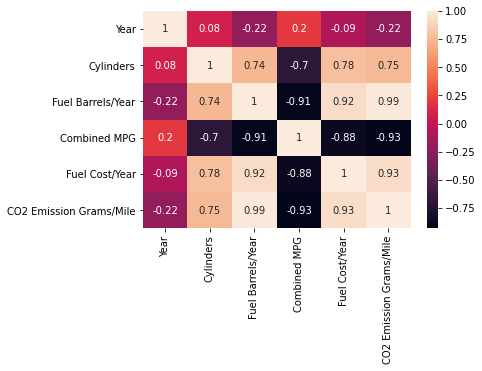

In [38]:
sns.heatmap(data=vehicle_copy.corr().round(2), annot=True)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [43]:
# Your response here. 
X = sm.add_constant(vehicle_copy[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']])
Y = vehicle['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                             12:53:23   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here.
#El valor de R-squared es cercano a 1 un muy buen modelo

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [45]:
# Your code here. 
data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
data.head()

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [47]:
# Your code here.
slope, intercept, r_value, p_value, std_err = linregress(data.X, data.Y)

In [48]:
r_value

0.9652303546573691

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

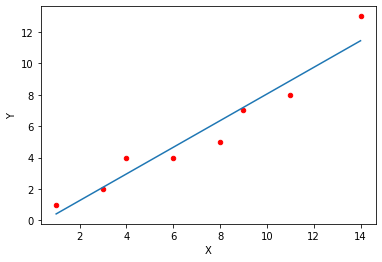

In [51]:
# Your response here.
data.plot('X','Y',kind='scatter', color='r')
plt.plot(data.X,intercept+slope*data.X)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 